In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
dus18 = pd.read_csv('DUS2018.csv')
dus18 = dus18[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio']]
dus18.head(3)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500


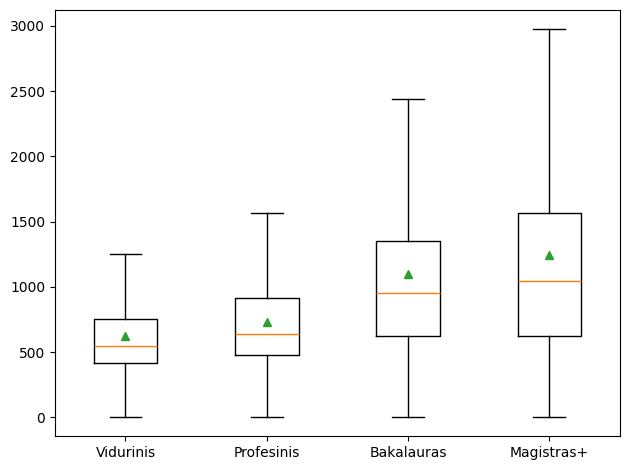

In [5]:
# boxplot()
atl_g1 = dus18.query('issilavinimas == "G1"')['bdu_spalio'].values
atl_g2 = dus18.query('issilavinimas == "G2"')['bdu_spalio'].values
atl_g3 = dus18.query('issilavinimas == "G3"')['bdu_spalio'].values
atl_g4 = dus18.query('issilavinimas == "G4"')['bdu_spalio'].values

atl = [atl_g1,atl_g2,atl_g3,atl_g4]
edus = ['Vidurinis','Profesinis','Bakalauras','Magistras+']

fig, axis = plt.subplots()
#plotting code:

axis.boxplot(atl, showmeans=True, showfliers=False)


axis.set_xticklabels(edus)

# axis.grid()
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

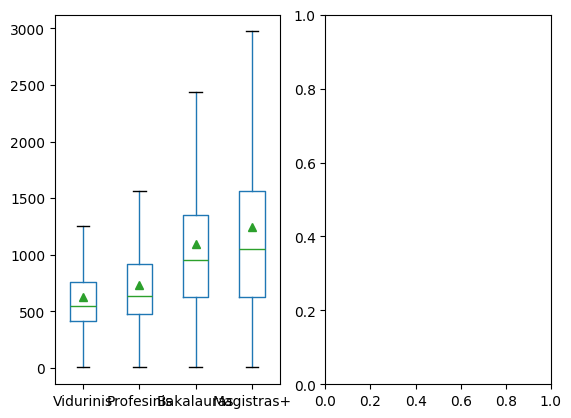

In [6]:
# II boxplot():

fig, (left, right) = plt.subplots(1,2)
dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=left)
left.grid(visible=False)
left.set_xticklabels(edus)
plt.show() #nerodo tekstu virs lenteles ('vidurinis','profesinis'...)

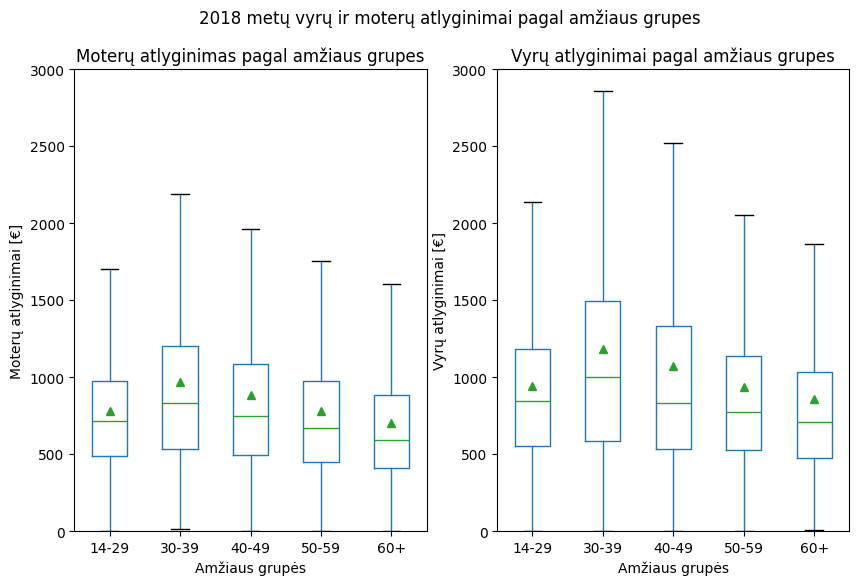

In [7]:
fig, (left, right) = plt.subplots(1,2, figsize=[10,6])

edus = ['14-29','30-39','40-49','50-59','60+']

dus18.query('lytis == "F"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=left)
dus18.query('lytis == "M"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=right)

left.set_ylabel ('Moterų atlyginimai [€]')
right.set_ylabel ('Vyrų atlyginimai [€]')
left.set_xlabel ('Amžiaus grupės')
right.set_xlabel ('Amžiaus grupės')
left.grid(visible=False)
right.grid(visible=False)
left.set_xticklabels(edus)
right.set_xticklabels(edus)
left.set_ylim(0,3000)
right.set_ylim(0,3000)
left.set_title('Moterų atlyginimas pagal amžiaus grupes')
right.set_title('Vyrų atlyginimai pagal amžiaus grupes')
plt.suptitle('2018 metų vyrų ir moterų atlyginimai pagal amžiaus grupes')
plt.show()

# ages = dus18['amzius'].value_counts().sort_index(ascending=True).index

In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import seaborn as sns

In [10]:
plt.style.use(style='default')
print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='bmh')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


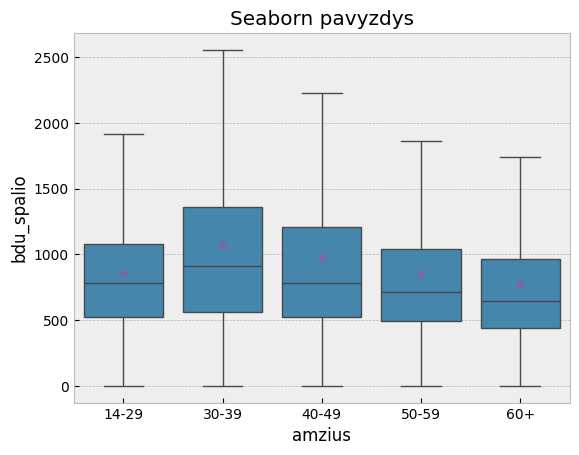

In [11]:
ax = sns.boxplot(data=dus18.sort_values(by='amzius'), x='amzius', y='bdu_spalio', showmeans=True, showfliers=False)
ax.set_title('Seaborn pavyzdys')
plt.show()

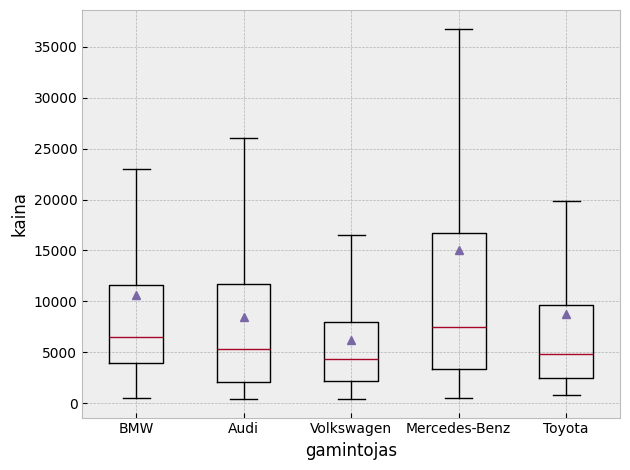

In [12]:
# auto.csv:
# nuskaitykite jį, kainą į skaičių paverskite
# Su boxplotu vizualizuokite 5kių gamintojų, daugiausiai turinčių modelių skelbimuose,
# kainų pasiskirstymus.

auto = pd.read_csv('auto.csv', sep ='|')
def kainos(price):
    kainos = float(price.replace(' ', ''))
    return kainos
auto['KainaS'] = auto['price'].apply(kainos)
gamintojai = auto['gamintojas'].value_counts().head()
bmw = auto.query('gamintojas == "BMW"')['KainaS'].values
volkswagen = auto.query('gamintojas == "Volkswagen"')['KainaS'].values
audi = auto.query('gamintojas == "Audi"')['KainaS'].values
merc = auto.query('gamintojas == "Mercedes-Benz"')['KainaS'].values
toyota = auto.query('gamintojas == "Toyota"')['KainaS'].values
aut = [bmw,audi, volkswagen,merc,toyota]
edus = ['BMW','Audi','Volkswagen','Mercedes-Benz','Toyota']
fig, axis = plt.subplots()
axis.boxplot(aut, showmeans=True, showfliers=False)
axis.set_xticklabels(edus)
axis.set_xlabel('gamintojas')
axis.set_ylabel('kaina')
fig.tight_layout()
plt.show()

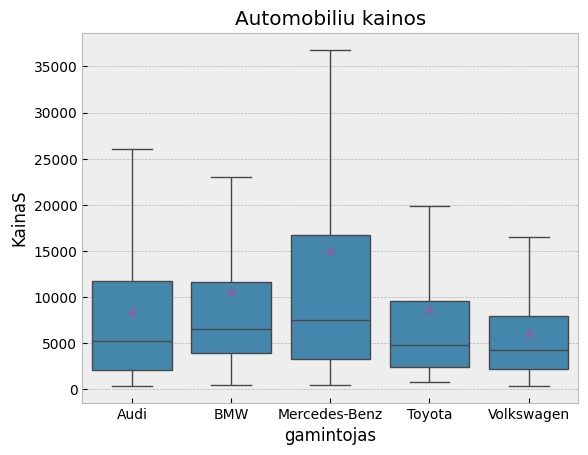

In [13]:
# auto.csv:
# nuskaitykite jį, kainą į skaičių paverskite
# Su boxplotu vizualizuokite 5kių gamintojų, daugiausiai turinčių modelių skelbimuose,
# kainų pasiskirstymus.

auto = pd.read_csv('auto.csv', sep ='|')
def kainos(price):
    kainos = float(price.replace(' ', ''))
    return kainos

auto['KainaS'] = auto['price'].apply(kainos)
sk = auto['gamintojas'].value_counts().head()
automod = auto.groupby(by='gamintojas')['modelis'].count().sort_values()
automod.tail().index
gamintojai = automod.tail().index
ax = sns.boxplot(auto.query('gamintojas in @gamintojai').sort_values(by='gamintojas'), x='gamintojas', y='KainaS', showmeans=True, showfliers=False)
ax.set_title('Automobiliu kainos')
plt.show()

<Axes: xlabel='gamintojas', ylabel='kaina'>

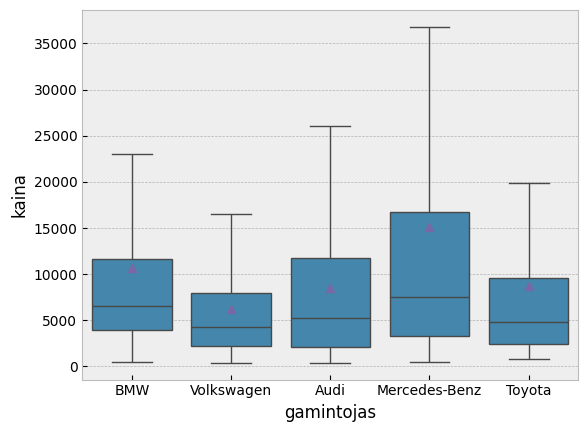

In [14]:
auto['kaina'] = auto['price'].apply(lambda x: float(x.replace(' ', ''))) # paverciam kainas
auto_atrinkta = auto.merge(auto.value_counts('gamintojas').head(), left_on = 'gamintojas', right_on = 'gamintojas', how = 'right') # sumerginam
sns.boxplot(data=auto_atrinkta, x = 'gamintojas', y = 'kaina', showfliers = False, showmeans = True) #braizom

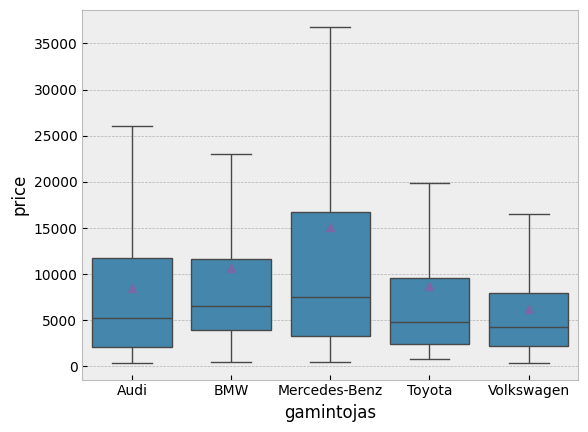

In [15]:
auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','price','modelis','rida']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
g = list(auto['gamintojas'].value_counts().sort_values(ascending=False).index[:5])
sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='price', showmeans=True, showfliers=False)
plt.show()

In [16]:
# .dt
# .str

auto.head()

,gamintojas,price,modelis,rida
0,BMW,19500.0,M5,253 000 km
1,Mitsubishi,2700.0,Outlander,195 405 km
2,Seat,13490.0,Arona,129 800 km
3,Skoda,14650.0,Octavia Scout,183 000 km
4,Volvo,38000.0,XC90,127 896 km


In [17]:
auto['G'] = auto['gamintojas'].str.upper().str[:3]
auto.head()

,gamintojas,price,modelis,rida,G
0,BMW,19500.0,M5,253 000 km,BMW
1,Mitsubishi,2700.0,Outlander,195 405 km,MIT
2,Seat,13490.0,Arona,129 800 km,SEA
3,Skoda,14650.0,Octavia Scout,183 000 km,SKO
4,Volvo,38000.0,XC90,127 896 km,VOL


In [18]:
# https://www.geeksforgeeks.org/top-10-string-methods-in-pandas/
#  meteo.lt  (duomenims is interneto nuskaityti)

In [19]:
import requests as rq

In [20]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
url = "https://api.meteo.lt/v1/stations"


response = rq.get(url)
print(response)
stations = response.json()
print(stations)

<Response [200]>
[{'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'kauno-ams', 'name': 'Kauno AMS', 'coordinates': {'latitude': 54.88396, 'longitude': 23.83588}}, {'code': 'klaipedos-ams', 'name': 'Klaipėdos AMS', 'coordinates': {'latitude': 55.73135, 'longitude': 21.09157}}, {'code': 'kybartu-ams', 'name': 'Kybartų AMS', 'coordinates': {'latitude': 54.633167, 'longitude': 22.783011}}, {'code': 'laukuvos-ams', 'name': 'Laukuvos AMS', 'coordinates': {'latitude': 55.60886, 'longitude': 22.239463}}, {'code': 'lazdiju-ams', 'name': 'Lazdijų AMS', 'coordinates': {'latitude': 54.23221, 'longitude': 23.51068}}, {'code': 'nidos-ams', 'name': 'Nidos AMS', 'coordinates': {'latitude': 55.30221, 'longitude': 21

In [22]:
#iš to responso išrinkite į sąrašą visus ams kodus ('code' raktažodis)

stotys = []
for x in stations:
    stotys.append(x['code'])
print(stotys)

['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [23]:
sar2 = [i['code'] for i in stations]
print(sar2)

['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [24]:
#atrinkiti visų stočių užfiksuotą temperatūrą 00:00:00 laiku, šiai dienai
temperaturos = []
for stotis in stotys:
    url =f"https://api.meteo.lt/v1/stations/{stotis}/observations/2024-04-18"
    response = rq.get(url)
    temp = response.json()
    sar  = temp["observations"][0]["airTemperature"]
    temperaturos.append(sar)
print(temperaturos)
print(stotys)

[1.9, 4.7, 0.5, 4.6, 3.6, 3.8, 3, 4.3, 4.6, 3.5, 1.2, 2.8, 4, 3.3, 2.5, 0.6, 1.6, 3.5]
['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [25]:
#rasti 3 meteo stotis, kuriose fiksuota temperatūra 00:00 laiku buvo didžiausia:

df = pd.DataFrame() #sitaip sukuriamas turscias data frame
df['Stotis'] = stotys
df['Temperatura'] = temperaturos

df.sort_values(by='Temperatura', ascending=False).head(3)

,Stotis,Temperatura
1,dotnuvos-ams,4.7
8,nidos-ams,4.6
3,kauno-ams,4.6


In [26]:
# urlFinal = urlStart + ams + urlEnd urlStart = 'https://api.meteo.lt/v1/stations/'
# ulrAms = ''
# urlEnd = '/observations/2024-04-18'

In [27]:
import math

In [28]:
tarkim = 19540
apvalinta = math.ceil(tarkim)
print(apvalinta)

19540


In [29]:
#nuskaitykite auto.csv failą į dataframe'ą.

auto = pd.read_csv('auto.csv', sep ='|')[['gamintojas','price','rida','modelis','kuro_tipas', 'pagaminimo_data']]

# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km

# math.ceil() arba np.ceil() apvalinimas

def rida_sk(rida):
    try:
        return float(rida.replace(' ','').replace('km',''))
    except:
        return -1

auto['rida'] = auto['rida'].apply(rida_sk)
auto.head()

def nauja_rida(rida):
    return np.ceil(rida/15000)*15000

auto['Nauja_rida'] = auto['rida'].apply(nauja_rida)
auto.head()

,gamintojas,price,rida,modelis,kuro_tipas,pagaminimo_data,Nauja_rida
0,BMW,19 500,253000.0,M5,Benzinas,2005-12,255000.0
1,Mitsubishi,2 700,195405.0,Outlander,Benzinas,2006,210000.0
2,Seat,13 490,129800.0,Arona,Dyzelinas,2019-11,135000.0
3,Skoda,14 650,183000.0,Octavia Scout,Benzinas,2015-06,195000.0
4,Volvo,38 000,127896.0,XC90,Dyzelinas,2018-08,135000.0


In [30]:
auto.head()

,gamintojas,price,rida,modelis,kuro_tipas,pagaminimo_data,Nauja_rida
0,BMW,19 500,253000.0,M5,Benzinas,2005-12,255000.0
1,Mitsubishi,2 700,195405.0,Outlander,Benzinas,2006,210000.0
2,Seat,13 490,129800.0,Arona,Dyzelinas,2019-11,135000.0
3,Skoda,14 650,183000.0,Octavia Scout,Benzinas,2015-06,195000.0
4,Volvo,38 000,127896.0,XC90,Dyzelinas,2018-08,135000.0


In [31]:
# suraskite visus gamintojus, kurių modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
kainos = []
def kainos(price):
    kainos = float(price.replace(' ', ''))
    return kainos

auto['KainaS'] = auto['price'].apply(kainos)
vidkaina_gamintoju = auto[['gamintojas','KainaS', 'pagaminimo_data']].groupby('gamintojas').mean(numeric_only=True).reset_index()
visu_vidkaina  = auto['KainaS'].mean(numeric_only=True)

brang = vidkaina_gamintoju.query('KainaS > @visu_vidkaina').sort_values(by='KainaS').tail().reset_index()
brangusauto = list(brang['gamintojas'].head().reset_index()['gamintojas'].values)
print(brangusauto)

['Maserati', 'Land Rover', 'Tesla', 'Porsche', 'Aston Martin']


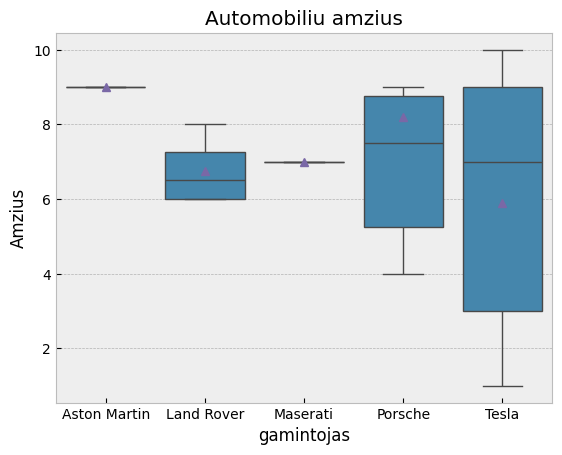

In [32]:
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.

def aut_amzius(pagaminimo_data):
    return 2024-float(pagaminimo_data[:4])

auto['Amzius'] = auto['pagaminimo_data'].apply(aut_amzius)

vidamz = auto.query('gamintojas in @brangusauto').groupby('gamintojas').mean(numeric_only=True).reset_index()
vidamz

ax = sns.boxplot(auto.query('gamintojas in @brangusauto').sort_values(by='gamintojas'), x='gamintojas', y='Amzius', showmeans=True, showfliers=False)
ax.set_title('Automobiliu amzius')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


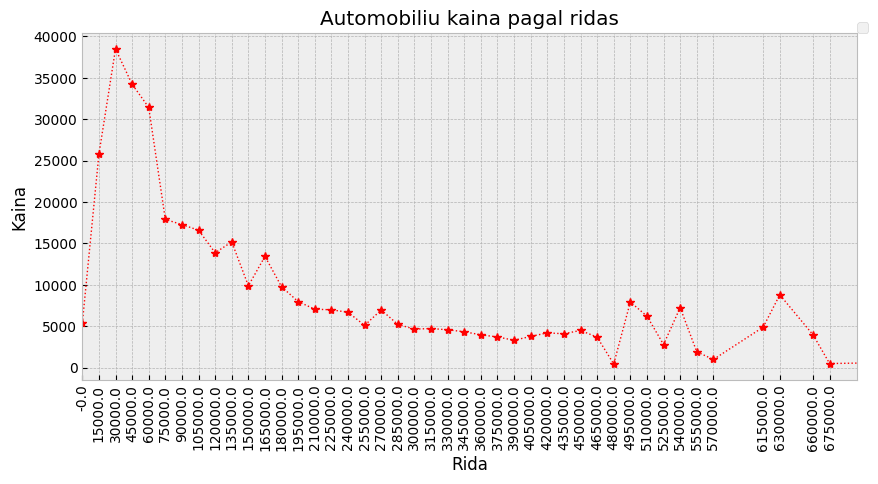

In [33]:
# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

vidkaina_int = auto.groupby(by='Nauja_rida')['KainaS'].mean(numeric_only=True).sort_index().reset_index()
kainos = auto.groupby(by='Nauja_rida')['KainaS'].mean(numeric_only=True).values
intervalai = auto.groupby(by='Nauja_rida')['KainaS'].mean(numeric_only=True).index

a = intervalai
b = kainos

fig, ax = plt.subplots(figsize =[10,4.5])
ax.plot(a,b, linestyle=':', color='red', linewidth=1, marker='*')
ax.set_ylabel('Kaina')
ax.set_xlabel('Rida')
ax.set_title('Automobiliu kaina pagal ridas')
ax.set_xticks(a)
ax.legend(loc=[1,1])
ax.set_xlim(0,700000)
ax.set_xticklabels(a, rotation=90)
plt.show()


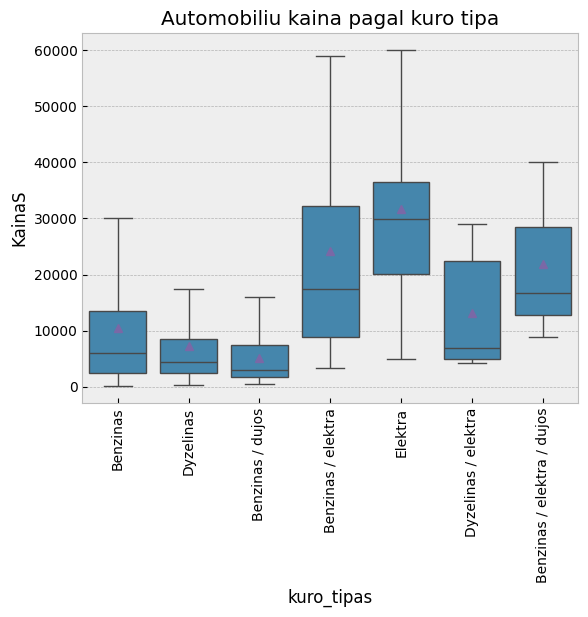

In [34]:
# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo

ax = sns.boxplot(auto, x='kuro_tipas', y='KainaS', showmeans=True, showfliers=False)
ax.set_title('Automobiliu kaina pagal kuro tipa')
ax.tick_params(axis='x', rotation=90)
# ax.set_xticklabels(x,rotation=90)
plt.show()

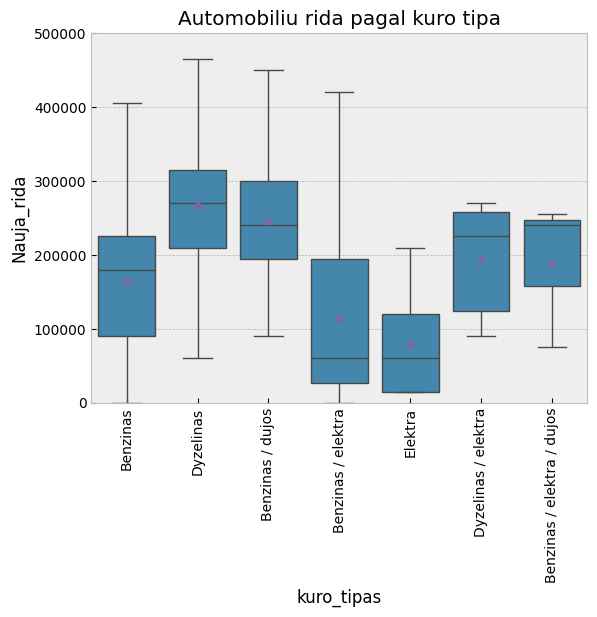

In [35]:
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo

ax = sns.boxplot(auto, x='kuro_tipas', y='Nauja_rida', showmeans=True, showfliers=False)
ax.set_title('Automobiliu rida pagal kuro tipa')
# ax.set_xticklabels(x,rotation=90)
ax.set_ylim(0,500000)
ax.tick_params(axis='x', rotation=90)
plt.show()

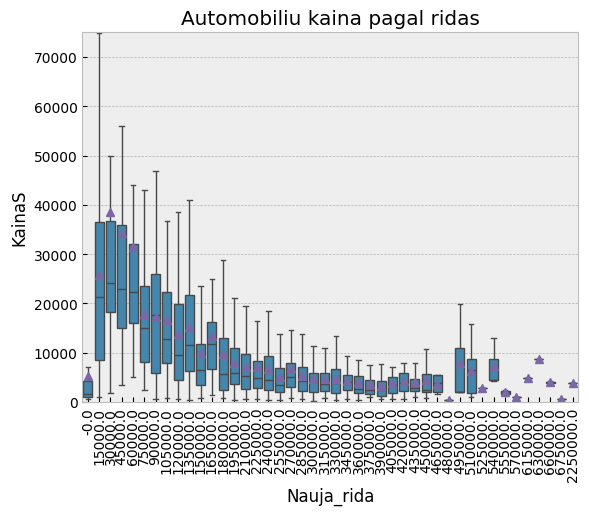

In [36]:
# atvaizduokite boxplotais kainos pasiskirstyma nuo ridos (15000 km intervalais apvalintos)

ax = sns.boxplot(auto, x='Nauja_rida', y='KainaS', showmeans=True, showfliers=False)
ax.set_title('Automobiliu kaina pagal ridas')
ax.set_ylim(0,75000)
ax.tick_params(axis='x', rotation=90)
plt.show()

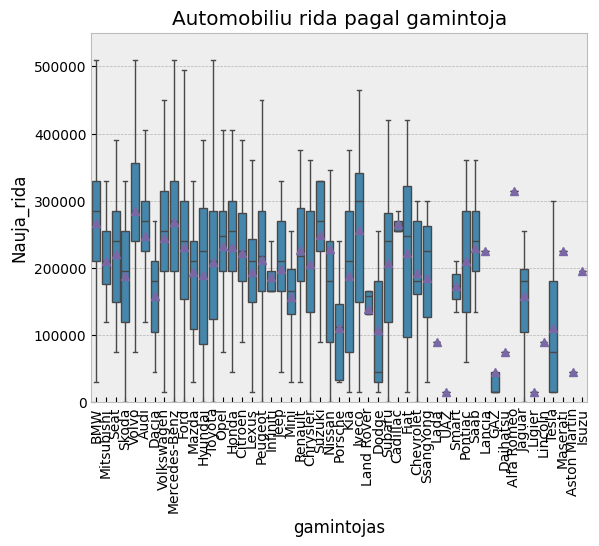

In [37]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

ax = sns.boxplot(auto, x='gamintojas', y='Nauja_rida', showmeans=True, showfliers=False)
ax.set_title('Automobiliu rida pagal gamintoja')
# ax.set_xticklabels(x,rotation=90)
ax.set_ylim(0,550000)
ax.tick_params(axis='x', rotation=90)
plt.show()

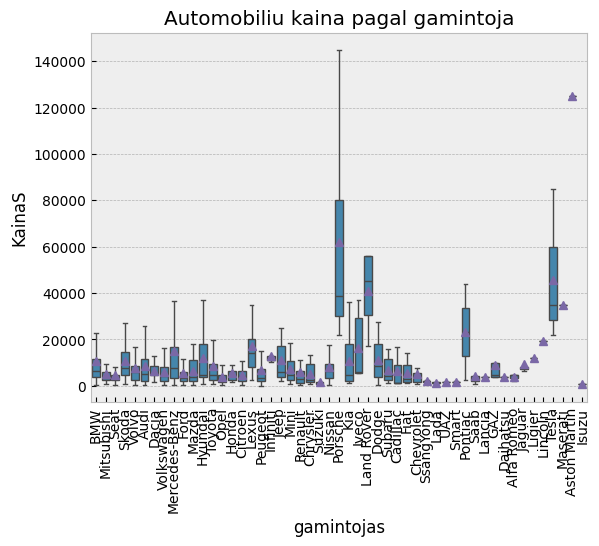

In [38]:
# suskaiciuokite vidutine kaina pagal gamintoja

ax = sns.boxplot(auto, x='gamintojas', y='KainaS', showmeans=True, showfliers=False)
ax.set_title('Automobiliu kaina pagal gamintoja')
# ax.set_xticklabels(x,rotation=90)
ax.tick_params(axis='x', rotation=90)
plt.show()


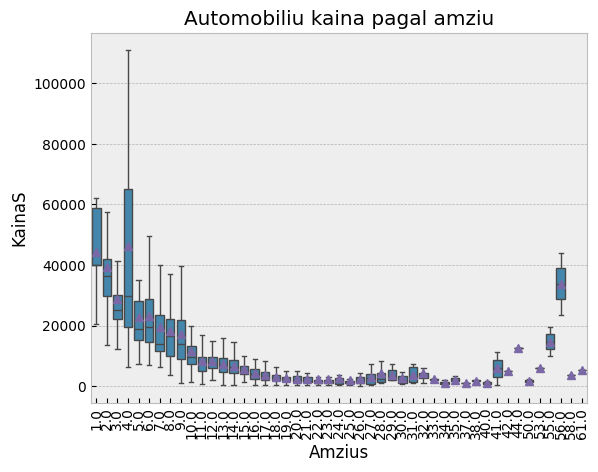

In [39]:
# suskaiciuokite vidutine kaina pagal amziu

ax = sns.boxplot(auto, x='Amzius', y='KainaS', showmeans=True, showfliers=False)
ax.set_title('Automobiliu kaina pagal amziu')
# ax.set_xticklabels(x,rotation=90)
ax.tick_params(axis='x', rotation=90)
plt.show()

In [40]:
uzd = pd.read_csv('uzduotis.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 10, saw 2
